In [1]:
import numpy as np
X = np.load('X_train.npy')
X.shape

(5760, 1000)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
### get current path
from pathlib import Path
path = Path.cwd()
path

PosixPath('/Users/mojtabaaskarzadeh/Library/CloudStorage/GoogleDrive-ma00048@mix.wvu.edu/My Drive/TSC Algorithms/Dataset/CWRU_12k_DE_univar')

In [4]:
path = '/Users/mojtabaaskarzadeh/Library/CloudStorage/GoogleDrive-ma00048@mix.wvu.edu/My Drive/1-time-series classification in manufacturing/Datasets/CWRU Bearing Dataset'
path =os.path.join(path,"raw")
path

'/Users/mojtabaaskarzadeh/Library/CloudStorage/GoogleDrive-ma00048@mix.wvu.edu/My Drive/1-time-series classification in manufacturing/Datasets/CWRU Bearing Dataset/raw'

In [5]:
sample_freq = '12k Drive End Bearing Fault Data'

In [6]:
dir_path =os.path.join(path,sample_freq)
dir_path

'/Users/mojtabaaskarzadeh/Library/CloudStorage/GoogleDrive-ma00048@mix.wvu.edu/My Drive/1-time-series classification in manufacturing/Datasets/CWRU Bearing Dataset/raw/12k Drive End Bearing Fault Data'

In [7]:
list = os.listdir(dir_path)
type(list), len(list)

(list, 60)

In [8]:
labels=[]
for (i, item) in enumerate(list):
    print(i, item)
    if item[0] =="B" :
        labels.append(item[0:4])
    else:
        labels.append(item[0:5])

0 IR028_2.mat
1 IR028_3.mat
2 IR028_1.mat
3 IR028_0.mat
4 B021_2.mat
5 B007_1.mat
6 OR021@12_2.mat
7 OR021@12_3.mat
8 B007_0.mat
9 B021_3.mat
10 B007_2.mat
11 B021_1.mat
12 OR021@12_1.mat
13 OR021@12_0.mat
14 B021_0.mat
15 B007_3.mat
16 IR014_1.mat
17 IR014_0.mat
18 IR014_2.mat
19 IR014_3.mat
20 B014_2.mat
21 OR007@6_1.mat
22 OR021@6_3.mat
23 OR021@6_2.mat
24 OR007@6_0.mat
25 B014_3.mat
26 B014_1.mat
27 OR007@6_2.mat
28 OR021@6_0.mat
29 OR021@6_1.mat
30 OR007@6_3.mat
31 B014_0.mat
32 OR007@12_3.mat
33 IR007_2.mat
34 IR021_1.mat
35 IR021_0.mat
36 IR007_3.mat
37 OR007@12_2.mat
38 OR007@12_0.mat
39 IR021_2.mat
40 IR007_1.mat
41 IR007_0.mat
42 IR021_3.mat
43 OR007@12_1.mat
44 B028_1.mat
45 OR014@6_2.mat
46 OR014@6_3.mat
47 B028_0.mat
48 B028_2.mat
49 OR014@6_1.mat
50 OR014@6_0.mat
51 B028_3.mat
52 OR021@3_2.mat
53 OR007@3_0.mat
54 OR007@3_1.mat
55 OR021@3_3.mat
56 OR021@3_1.mat
57 OR007@3_3.mat
58 OR007@3_2.mat
59 OR021@3_0.mat


In [9]:
np.unique(labels, return_counts=True)

(array(['B007', 'B014', 'B021', 'B028', 'IR007', 'IR014', 'IR021', 'IR028',
        'OR007', 'OR014', 'OR021'], dtype='<U5'),
 array([ 4,  4,  4,  4,  4,  4,  4,  4, 12,  4, 12]))

In [10]:
import sklearn.preprocessing
enc = sklearn.preprocessing.LabelEncoder()
labels_num = enc.fit_transform(labels)
#labels_num = enc.transform(labels.reshape(-1, 1)).toarray()
#y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
labels_num[0]

7

In [11]:
import scipy.io
data_len=[]
univar_list = []
multivar_list = []
for i in range(len(list)):
    file = scipy.io.loadmat(os.path.join(dir_path,str(list[i])))
    a = len(file.keys())
    if a == 4:
        univar_list.append(list[i])
    elif a ==7:
        multivar_list.append(list[i])
    for j,v in enumerate(file):
        if j ==3:
            DE = file[str(v)]
        if j ==4:
            FE = file[str(v)]
        if j ==5:
            BA = file[str(v)]
    data_len.append(DE.shape[0])



In [12]:
min(data_len), max(data_len)

(120801, 122917)

In [13]:
sum(data_len)

7313758

In [14]:
univar_list


['IR028_2.mat',
 'IR028_3.mat',
 'IR028_1.mat',
 'IR028_0.mat',
 'B028_1.mat',
 'B028_0.mat',
 'B028_2.mat',
 'B028_3.mat']

In [15]:
multivar_list

['B021_2.mat',
 'B007_1.mat',
 'OR021@12_2.mat',
 'OR021@12_3.mat',
 'B007_0.mat',
 'B021_3.mat',
 'B007_2.mat',
 'B021_1.mat',
 'OR021@12_1.mat',
 'OR021@12_0.mat',
 'B021_0.mat',
 'B007_3.mat',
 'IR014_1.mat',
 'IR014_0.mat',
 'IR014_2.mat',
 'IR014_3.mat',
 'B014_2.mat',
 'OR007@6_1.mat',
 'OR021@6_3.mat',
 'OR021@6_2.mat',
 'OR007@6_0.mat',
 'B014_3.mat',
 'B014_1.mat',
 'OR007@6_2.mat',
 'OR021@6_0.mat',
 'OR021@6_1.mat',
 'OR007@6_3.mat',
 'B014_0.mat',
 'OR007@12_3.mat',
 'IR007_2.mat',
 'IR021_1.mat',
 'IR021_0.mat',
 'IR007_3.mat',
 'OR007@12_2.mat',
 'OR007@12_0.mat',
 'IR021_2.mat',
 'IR007_1.mat',
 'IR007_0.mat',
 'IR021_3.mat',
 'OR007@12_1.mat',
 'OR014@6_2.mat',
 'OR014@6_3.mat',
 'OR014@6_1.mat',
 'OR014@6_0.mat',
 'OR021@3_2.mat',
 'OR007@3_0.mat',
 'OR007@3_1.mat',
 'OR021@3_3.mat',
 'OR021@3_1.mat',
 'OR007@3_3.mat',
 'OR007@3_2.mat',
 'OR021@3_0.mat']

In [16]:
multivar_len=[]
for i in range(len(multivar_list)):
    file = scipy.io.loadmat(os.path.join(dir_path,str(list[i])))

    for j,v in enumerate(file):
        if j ==3:
            DE = file[str(v)]
        if j ==4:
            FE = file[str(v)]
        if j ==5:
            BA = file[str(v)]
    multivar_len.append(DE.shape[0])

In [17]:
min(multivar_len), max(multivar_len)

(120801, 122917)

In [18]:
sum(multivar_len)

6337685

In [19]:
len(univar_list), len(multivar_list)

(8, 52)

In [20]:
N = int(len(list) * np.floor(min(data_len)/1000))
T = 1000
M=1

N,T,M

(7200, 1000, 1)

In [21]:
Dataset=np.zeros((N,T,M))
Dataset.shape

(7200, 1000, 1)

In [22]:
Labels = np.zeros((N,1))

In [23]:
archive = 'IR028_2.mat'
print(archive)

IR028_2.mat


In [24]:
File1 = scipy.io.loadmat(os.path.join(dir_path,archive))

In [25]:
File1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X058_DE_time'])

In [28]:
step = int(np.floor(min(data_len)/1000))
i = 0
for j in range(len(list)):
    file = scipy.io.loadmat(os.path.join(dir_path,str(list[j])))
    for k,v in enumerate(file):
        if k ==3:
            Arr = file[str(v)][0:120000]
            #print(Arr.shape)
            Dataset[i:i+step,:,0] = np.reshape(Arr, newshape=(step, 1000))
    i += step
                

In [29]:
Dataset.shape

(7200, 1000, 1)

In [30]:
i=0
for j in range(len(labels)):
    Labels[i:i+step] = labels_num[j]
    i +=step


{0.0: 6.67, 1.0: 6.67, 2.0: 6.67, 3.0: 6.67, 4.0: 6.67, 5.0: 6.67, 6.0: 6.67, 7.0: 6.67, 8.0: 20.0, 9.0: 6.67, 10.0: 20.0}


Text(0, 0.5, 'Frequency %')

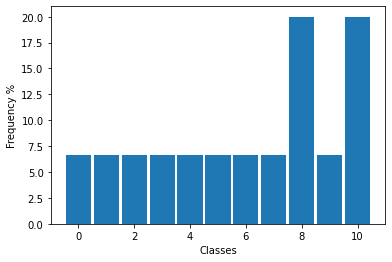

In [31]:

##Finding balanced vs imbalanced dataset
unique, counts = np.unique(Labels, return_counts=True)
percent = (counts*100)/len(Labels)
print(dict(zip(unique, np.round(percent, decimals=2))))
plt.bar(unique, percent, width=0.9)
plt.xlabel('Classes')
plt.ylabel('Frequency %')

In [32]:
Labels.shape

(7200, 1)

In [50]:
## Standard Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
StdDataset = scaler.fit_transform(Dataset)

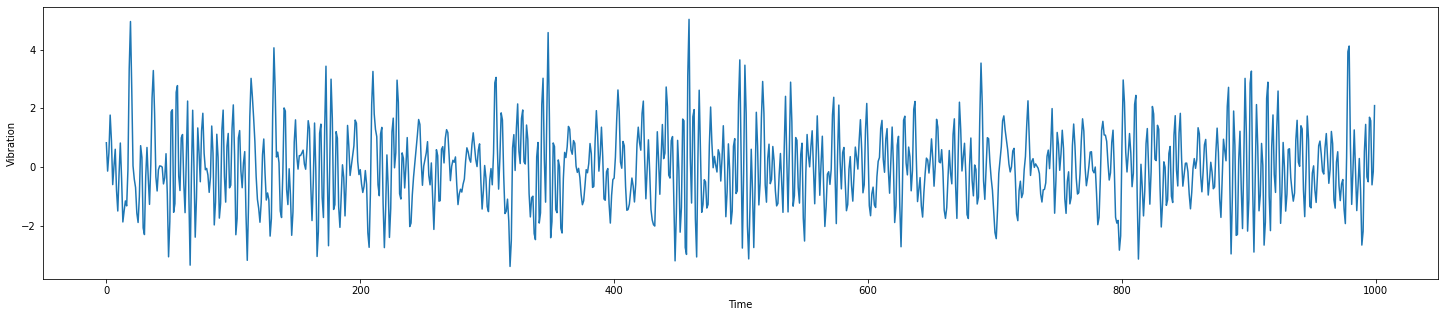

In [53]:
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(StdDataset[27])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()


Text(0.5, 1.0, 'base accelerometer sensor')

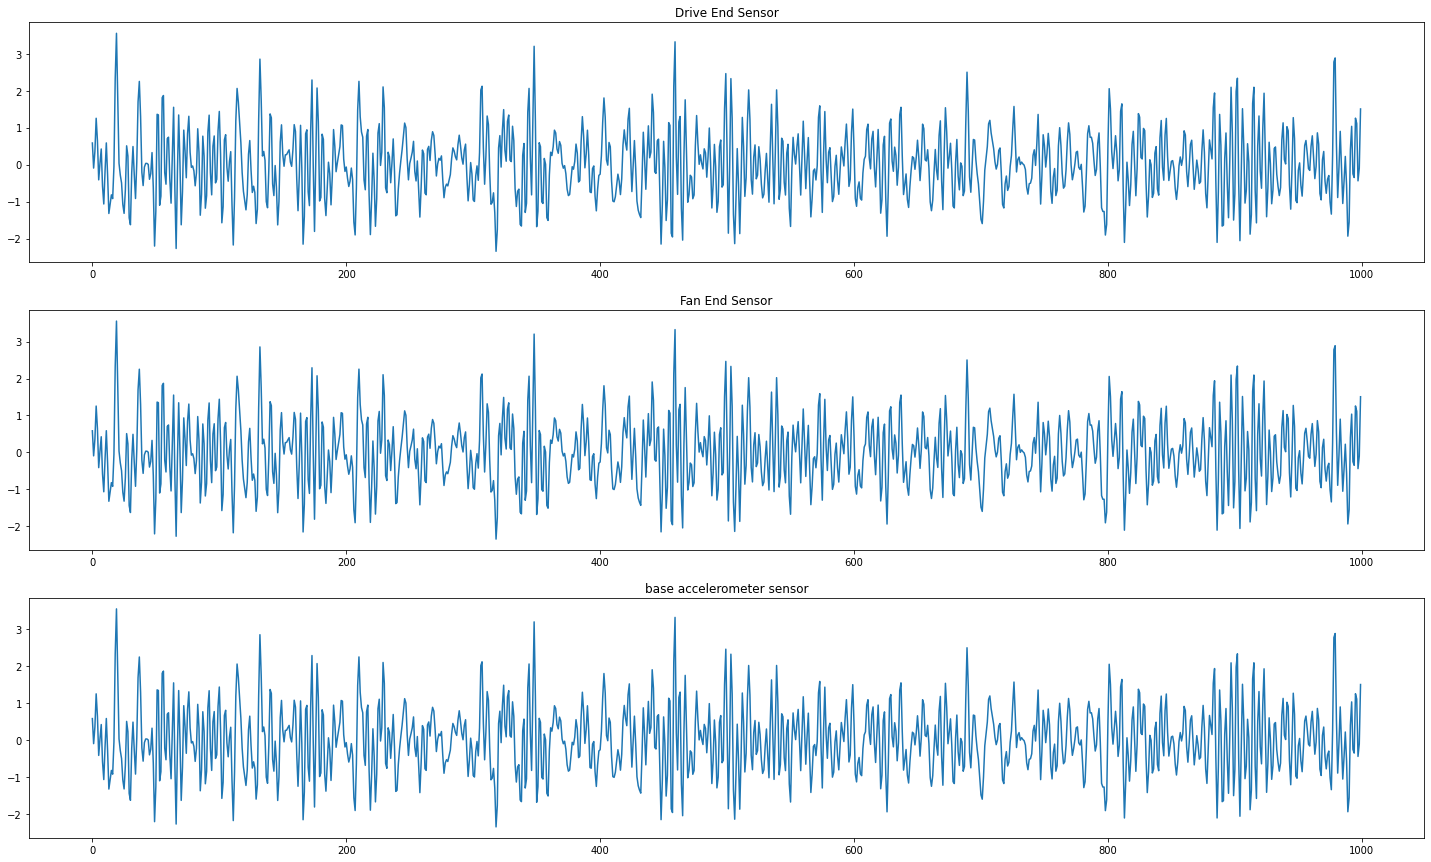

In [34]:
import matplotlib.pyplot as plt
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, figsize=(25, 15))
axis[0].plot(Dataset[27,:])
axis[0].set_title("Drive End Sensor")

axis[1].plot(Dataset[27,:])
axis[1].set_title("Fan End Sensor")

axis[2].plot(Dataset[27,:])
axis[2].set_title("base accelerometer sensor")

In [33]:
##Generate the initial training and test sets to feed to the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Dataset, Labels, train_size=0.8 ,shuffle=True)
np.save('X_train', X_train, allow_pickle=True, fix_imports=True)
np.save('X_test', X_test, allow_pickle=True, fix_imports=True)
np.save('y_train', y_train, allow_pickle=True, fix_imports=True)
np.save('y_test', y_test, allow_pickle=True, fix_imports=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5760, 1000, 1), (1440, 1000, 1), (5760, 1), (1440, 1))

In [36]:
X_train[27].shape

(1000, 1)

In [ ]:
min(data_len),max(data_len)

In [ ]:
File1.keys()

In [ ]:
T = np.floor(min(data_len)/1000)
T

In [ ]:
#PATH = os.path.join(dir_path,archive)
#PATH

In [ ]:
File1['X246_BA_time']

In [ ]:
type(File1['X118_DE_time'])

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File1['X118_DE_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File1['X118_FE_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File1['X118_BA_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()

In [ ]:
archive = 'B007_1.mat'
print(archive)

In [ ]:
File2 = scipy.io.loadmat(os.path.join(dir_path,archive))

In [ ]:
File2.keys()

In [ ]:
File2['X119_DE_time'].shape

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File2['X119_DE_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File2['X119_FE_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(File2['X119_BA_time'][0:2000])
plt.xlabel("Time")
plt.ylabel("Vibration")

plt.show()